In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv("ab_test_data.csv")
df.head()


,user_id,group,converted
0,1,control,0
1,2,control,0
2,3,control,1
3,4,control,0
4,5,control,0


In [2]:
control = df[df["group"] == "control"]
test = df[df["group"] == "test"]


In [6]:
 #H0: Conversion rate of control group = conversion rate of test group
 #H1: Conversion rate of control group != conversion rate of test group
 #Alpha = 0.05

control_rate = control["converted"].mean()
test_rate = test["converted"].mean()

control_rate, test_rate


(np.float64(0.3), np.float64(0.68))

In [7]:
table = pd.crosstab(df["group"], df["converted"])
table
chi2, p_value, dof, expected = stats.chi2_contingency(table)
p_value


np.float64(0.0003173369188364407)

In [8]:
alpha = 0.05

if p_value < alpha:
    decision = "Reject Null Hypothesis"
else:
    decision = "Fail to Reject Null Hypothesis"

decision


'Reject Null Hypothesis'

In [9]:
diff = test_rate - control_rate

se = np.sqrt(
    (control_rate * (1 - control_rate) / len(control)) +
    (test_rate * (1 - test_rate) / len(test))
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

diff, ci_low, ci_high


(np.float64(0.38000000000000006),
 np.float64(0.1987450326197928),
 np.float64(0.5612549673802073))

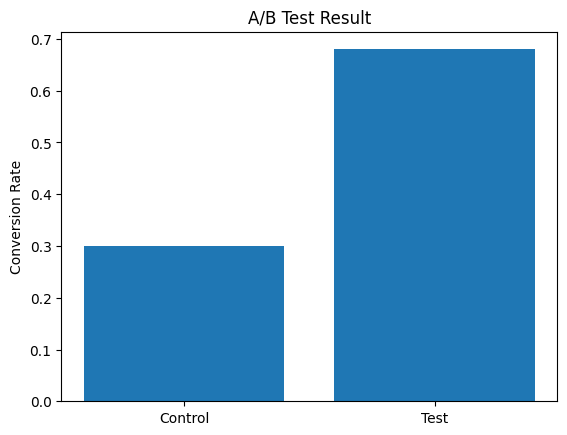

In [10]:
plt.bar(["Control", "Test"], [control_rate, test_rate])
plt.ylabel("Conversion Rate")
plt.title("A/B Test Result")
plt.show()


In [11]:
summary = pd.DataFrame({
    "Group": ["Control", "Test"],
    "Conversion Rate": [control_rate, test_rate]
})

summary.to_csv("ab_test_summary.csv", index=False)
